In [1]:
import pickle
import numpy as np

In [2]:
with open('UPDATED_NLP_COURSE/06-Deep-Learning/train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('UPDATED_NLP_COURSE/06-Deep-Learning/test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [4]:
len(train_data)

10000

In [5]:
len(test_data)

1000

In [6]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [7]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [8]:
all_data = test_data + train_data

In [9]:
len(all_data)

11000

In [11]:
vocab = set()
for story,question,answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))
print(vocab)

{'went', 'got', 'left', 'the', 'travelled', 'dropped', 'bedroom', 'up', '.', 'Sandra', 'John', 'to', 'milk', '?', 'Daniel', 'down', 'put', 'back', 'there', 'grabbed', 'kitchen', 'took', 'bathroom', 'apple', 'office', 'Is', 'football', 'journeyed', 'Mary', 'moved', 'discarded', 'picked', 'garden', 'hallway', 'in'}


In [12]:
vocab.add('no')

In [13]:
vocab.add('yes')

In [14]:
vocab_len = len(vocab) + 1

In [15]:
all_story_lens = [len(data[0]) for data in all_data]

In [16]:
max_question_len = max([len(data[1]) for data in all_data])

In [17]:
max_question_len

6

In [30]:
max_story_len = max([len(data[0]) for data in all_data])

In [18]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [19]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [20]:
tokenizer.word_index

{'went': 1,
 'got': 2,
 'left': 3,
 'the': 4,
 'travelled': 5,
 'dropped': 6,
 'bedroom': 7,
 'up': 8,
 '.': 9,
 'sandra': 10,
 'john': 11,
 'to': 12,
 'milk': 13,
 '?': 14,
 'daniel': 15,
 'down': 16,
 'put': 17,
 'back': 18,
 'there': 19,
 'grabbed': 20,
 'kitchen': 21,
 'took': 22,
 'bathroom': 23,
 'apple': 24,
 'office': 25,
 'is': 26,
 'football': 27,
 'journeyed': 28,
 'mary': 29,
 'moved': 30,
 'discarded': 31,
 'no': 32,
 'picked': 33,
 'garden': 34,
 'hallway': 35,
 'yes': 36,
 'in': 37}

In [21]:
train_story_text, train_question_text, train_answers = [],[],[]

In [22]:
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)
    train_answers.append(answer)

In [23]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [24]:
len(train_story_seq)

10000

In [25]:
len(train_story_text)

10000

In [27]:
train_story_text[:10]

[['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.'],
 ['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to

In [84]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):
    '''
    INPUT: 
    
    data: consisting of Stories,Queries,and Answers
    word_index: word index dictionary from tokenizer
    max_story_len: the length of the longest story (used for pad_sequences function)
    max_question_len: length of the longest question (used for pad_sequences function)


    OUTPUT:
    
    Vectorizes the stories,questions, and answers into padded sequences. We first loop for every story, query , and
    answer in the data. Then we convert the raw words to an word index value. Then we append each set to their appropriate
    output list. Then once we have converted the words to numbers, we pad the sequences so they are all of equal length.
    
    Returns this in the form of a tuple (X,Xq,Y) (padded based on max lengths)
    '''
    
    
    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []
    
    
    for story, query, answer in data:
        
        # Grab the word index for every word in story
        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]
        
        # Grab the Answers (either Yes/No so we don't need to use list comprehension here)
        # Index 0 is reserved so we're going to use + 1
        y = np.zeros(len(word_index) + 1)
        
        # Now that y is all zeros and we know its just Yes/No , we can use numpy logic to create this assignment
        #
        y[word_index[answer]] = 1
        
        # Append each set of story,query, and answer to their respective holding lists
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    # Finally, pad the sequences based on their max length so the RNN can be trained on uniformly long sequences.
        
    # RETURN TUPLE FOR UNPACKING
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [33]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data,max_story_len=max_story_len,max_question_len=max_question_len)

In [34]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data,max_story_len=max_story_len,max_question_len=max_question_len)

In [36]:
answers_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [37]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [38]:
tokenizer.word_index['yes']

36

In [39]:
tokenizer.word_index['no']

32

In [40]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 503.,
         0.,   0.,   0., 497.,   0.])

In [41]:
from keras.models import Sequential,Model

In [42]:
from keras.layers.embeddings import Embedding

In [43]:
from keras.layers import Input,Activation,Dense, Permute, Dropout, add,dot, concatenate,LSTM

In [44]:
## PLACEHOLDER shape=(max_story_len,batch_size)
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))


In [47]:
# vocab_len
vocab_size = len(vocab) + 1

In [49]:
## Input encoder M
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size, output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [51]:
## Input encoder C
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size, output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [52]:
## Question encoder
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [53]:
## ENCODED <---- ENCODER(input)
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [54]:
match = dot([input_encoded_m, question_encoded], axes=(2,2))

In [55]:
match = Activation('softmax')(match)

In [56]:
response = add([match,input_encoded_c])

In [57]:
response = Permute((2,1))(response)

In [58]:
answer = concatenate([response,question_encoded])

In [59]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [60]:
answer = LSTM(32)(answer)

In [61]:
answer = Dropout(0.5)(answer)

In [62]:
answer = Dense(vocab_size)(answer)

In [63]:
answer = Activation('softmax')(answer)

In [64]:
model = Model([input_sequence,question],answer)

In [66]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [67]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_3 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_6 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [68]:
history = model.fit([inputs_train,queries_train],answers_train, batch_size=32, epochs=3, validation_data = ([inputs_train,queries_train],answers_train))

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 10000 samples, validate on 10000 samples
Epoch 1/3
10000/10000 [==============================] - 7s 722us/step - loss: 0.9578 - accuracy: 0.4987 - val_loss: 0.6947 - val_accuracy: 0.4988
Epoch 2/3
10000/10000 [==============================] - 6s 628us/step - loss: 0.7042 - accuracy: 0.4956 - val_loss: 0.6933 - val_accuracy: 0.5012
Epoch 3/3
10000/10000 [==============================] - 6s 617us/step - loss: 0.6962 - accuracy: 0.5012 - val_loss: 0.6938 - val_accuracy: 0.4988


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


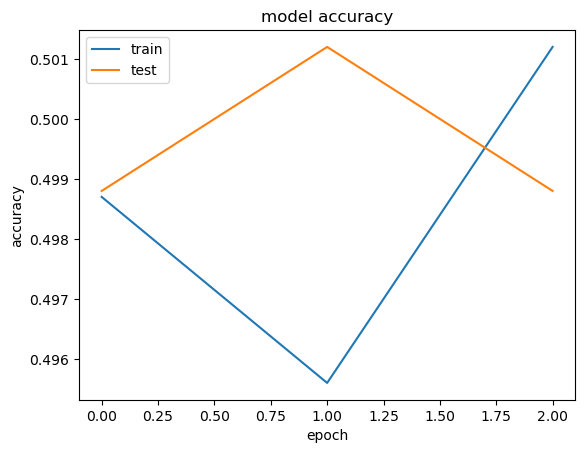

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
model.load_weights('UPDATED_NLP_COURSE/06-Deep-Learning/chatbot_10.h5')

In [72]:
pred_results = model.predict(([inputs_test,queries_test]))

In [73]:
pred_results.shape

(1000, 38)

In [74]:
val_max = np.argmax(pred_results[0])

In [75]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [76]:
k

'there'

In [77]:
# Note the whitespace of the periods
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [78]:
my_question = "Is the football in the garden ?"

In [79]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [82]:
mydata = [(my_story.split(), my_question.split(),'yes')]

In [85]:
my_story, my_ques, my_ans = vectorize_stories(mydata)

In [86]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0.]])

In [87]:
pred_results = model.predict(([ my_story, my_ques]))

In [88]:
#Generate prediction from model
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  dropped
Probability of certainty was:  0.8363526
